In [1]:
!pip install scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
filname = 'Indian-Liver-Patient.csv'
col_names = ['age','gen','tbili','dbili','alkphos','sgpt','tp','alb','ag','class']

In [4]:
#Cargamos el dataset Indian liver patient
df = pd.read_csv(filname, names=col_names)
df = df.drop(df.index[0])
df.head()


,age,gen,tbili,dbili,alkphos,sgpt,tp,alb,ag,class
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1
58,Male,1,0.4,182,14,20,6.8,3.4,1,1
72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1


In [5]:
#Identificamos númerica o gráficamente aquellas variables qeu son susceptibles de aplicar una transformación
x = df[df.columns[:-1]]
y = df['class']
#Transformamos la variable categórica
dato_entrada = pd.get_dummies(y, prefix=['gen'])
print(dato_entrada.head())

    ['gen']_1  ['gen']_2
65          1          0
62          1          0
62          1          0
58          1          0
72          1          0


In [6]:
#Elegimos una variable numérica y aplicamos uno a uno todos los métodos de escalado 
#de variables de datos que se han visto en la lección 
print(df['tbili'])

65    0.1
62    5.5
62    4.1
58    0.4
72      2
     ... 
60    0.1
40    0.1
52    0.2
31    0.5
38    0.3
Name: tbili, Length: 583, dtype: object


## Normalización

In [7]:
MinMaxSc = MinMaxScaler(feature_range=(0, 1))
MinMaxSc.fit(df[['tbili']])
rescNorm = MinMaxSc.transform(df[['tbili']])
print(rescNorm[:,:])

[[0.        ]
 [0.2755102 ]
 [0.20408163]
 [0.01530612]
 [0.09693878]
 [0.03061224]
 [0.00510204]
 [0.01020408]
 [0.01020408]
 [0.00510204]
 [0.        ]
 [0.06122449]
 [0.01020408]
 [0.01530612]
 [0.00510204]
 [0.        ]
 [0.03571429]
 [0.02040816]
 [0.01020408]
 [0.01020408]
 [0.04591837]
 [0.06122449]
 [0.14795918]
 [0.04591837]
 [0.00510204]
 [0.09693878]
 [0.09693878]
 [0.14795918]
 [0.02040816]
 [0.00510204]
 [0.09183673]
 [0.00510204]
 [0.01020408]
 [0.05612245]
 [0.05612245]
 [0.01530612]
 [0.00510204]
 [0.39285714]
 [0.0255102 ]
 [0.06122449]
 [0.05102041]
 [0.        ]
 [0.15816327]
 [0.05612245]
 [0.01020408]
 [0.0255102 ]
 [0.08673469]
 [0.01020408]
 [0.        ]
 [0.44387755]
 [0.00510204]
 [0.        ]
 [0.07653061]
 [0.01020408]
 [0.2244898 ]
 [0.2244898 ]
 [0.00510204]
 [0.00510204]
 [0.00510204]
 [0.02040816]
 [0.00510204]
 [0.02040816]
 [0.02040816]
 [0.00510204]
 [0.01530612]
 [0.03061224]
 [0.05612245]
 [0.03571429]
 [0.00510204]
 [0.00510204]
 [0.00510204]
 [0.00

##  Estandarización

In [8]:
Escalado = StandardScaler().fit(df[['tbili']])
Estan1 = Escalado.transform(df[['tbili']])
print(Estan1[:5,:])
print(20*'=')
Escalado2 = RobustScaler().fit(df[['tbili']])
Estan2 = Escalado2.transform(df[['tbili']])
print(Estan2[:5,:])

[[-0.49396398]
 [ 1.43042334]
 [ 0.93150811]
 [-0.38705357]
 [ 0.18313526]]
[[-0.18181818]
 [ 4.72727273]
 [ 3.45454545]
 [ 0.09090909]
 [ 1.54545455]]


array([<AxesSubplot: ylabel='Density'>], dtype=object)

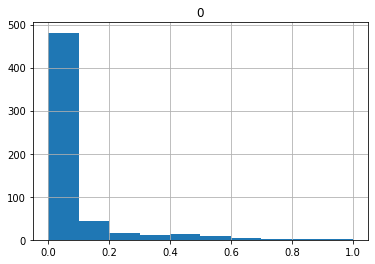

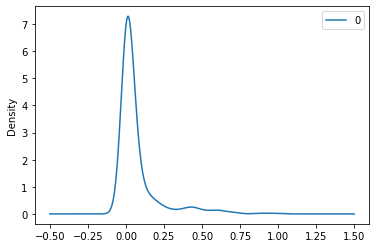

In [9]:
#Comparar graficamente la densidad de los efectos producidos en la variable
df1 = pd.DataFrame(rescNorm.flatten())
df1.hist()
df1.plot(kind='density', subplots=True)

array([<AxesSubplot: ylabel='Density'>], dtype=object)

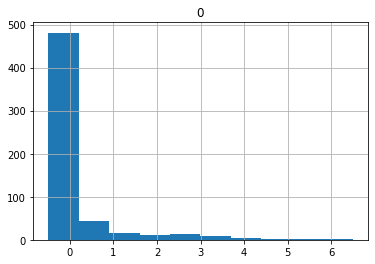

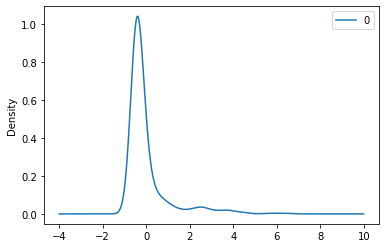

In [10]:
df2 = pd.DataFrame(Estan1.flatten())
df2.hist()
df2.plot(kind='density', subplots=True)

array([<AxesSubplot: ylabel='Density'>], dtype=object)

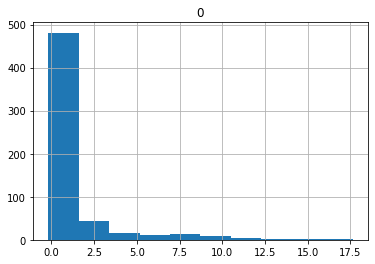

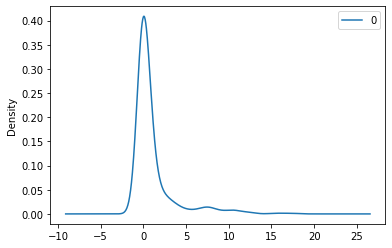

In [11]:
df3 = pd.DataFrame(Estan2.flatten())
df3.hist()
df3.plot(kind='density', subplots=True)